## THE BRIDGE (Data Science Bootcamp - Agosto 2020)
##  PROYECTO GRUPO D 
________________
### Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.

Fuente de datos (Data Set)  "https://covid.ourworldindata.org/data/owid-covid-data.csv"

Team members: 
- José Luis Manjon  presimanjon@yahoo.es        git @JoseLuisManjon
- Filipa Teles      filipa.teles@icloud.com     git 
- Mónica Villasuso  villasuso.monica@gmail.com  git @MVillasuso
_________________

Import de las librerías requeridas para el análisis

In [125]:
import pandas as pd 
import json 
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px 
import plotly.io as pio
from datetime import datetime

Carga de datos en un dataframe de la fuente a utilizar

In [46]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url, sep=",")
covid_general.head(5)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...          1.337        1803.987              NaN                597.029   
1  ...          1.337        1803.987              NaN                597.029   
2  ...          1.337        1803.987              NaN                597.029   
3  ...          1.337        1803.987              NaN                597.029   
4  ...          1.337        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  
0                         0.5            64.83  
1                         0.5            64.83  
2                         0.5            64.83  
3                         0.5            64.83  
4                         0.5            64.83  

[5 rows x 36 columns]

Exploración de los datos del dataframe

In [47]:
covid_general.shape

(35717, 36)

In [48]:
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35653 non-null  object 
 1   continent                        35430 non-null  object 
 2   location                         35717 non-null  object 
 3   date                             35717 non-null  object 
 4   total_cases                      35372 non-null  float64
 5   new_cases                        35372 non-null  float64
 6   total_deaths                     35372 non-null  float64
 7   new_deaths                       35372 non-null  float64
 8   total_cases_per_million          35308 non-null  float64
 9   new_cases_per_million            35308 non-null  float64
 10  total_deaths_per_million         35308 non-null  float64
 11  new_deaths_per_million           35308 non-null  float64
 12  new_tests         

In [49]:
covid_general.index

RangeIndex(start=0, stop=35717, step=1)

In [50]:
# Revisión de los datos globales para ver si hay información totalizada (continent or country tienen valor  Null) y eliminarla posteriormente para el análisis
covid_general[(covid_general.continent.isnull()) | (covid_general.iso_code.isnull())]

iso_code continent       location        date  total_cases  new_cases  \
35430  OWID_WRL       NaN          World  2019-12-31         27.0       27.0   
35431  OWID_WRL       NaN          World  2020-01-01         27.0        0.0   
35432  OWID_WRL       NaN          World  2020-01-02         27.0        0.0   
35433  OWID_WRL       NaN          World  2020-01-03         44.0       17.0   
35434  OWID_WRL       NaN          World  2020-01-04         44.0        0.0   
...         ...       ...            ...         ...          ...        ...   
35712       NaN       NaN  International  2020-02-28        705.0        0.0   
35713       NaN       NaN  International  2020-02-29        705.0        0.0   
35714       NaN       NaN  International  2020-03-01        705.0        0.0   
35715       NaN       NaN  International  2020-03-02        705.0        0.0   
35716       NaN       NaN  International  2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
35430           0.0         0.0                    0.003   
35431           0.0         0.0                    0.003   
35432           0.0         0.0                    0.003   
35433           0.0         0.0                    0.006   
35434           0.0         0.0                    0.006   
...             ...         ...                      ...   
35712           4.0         0.0                      NaN   
35713           6.0         2.0                      NaN   
35714           6.0         0.0                      NaN   
35715           6.0         0.0                      NaN   
35716           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
35430                  0.003  ...          5.355       15469.207   
35431                  0.000  ...          5.355       15469.207   
35432                  0.000  ...          5.355       15469.207   
35433                  0.002  ...          5.355       15469.207   
35434                  0.000  ...          5.355       15469.207   
...                      ...  ...            ...             ...   
35712                    NaN  ...            NaN             NaN   
35713                    NaN  ...            NaN             NaN   
35714                    NaN  ...            NaN             NaN   
35715                    NaN  ...            NaN             NaN   
35716                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
35430             10.0                 233.07                 8.51   
35431             10.0                 233.07                 8.51   
35432             10.0                 233.07                 8.51   
35433             10.0                 233.07                 8.51   
35434             10.0                 233.07                 8.51   
...                ...                    ...                  ...   
35712              NaN                    NaN                  NaN   
35713              NaN                    NaN                  NaN   
35714              NaN                    NaN                  NaN   
35715              NaN                    NaN                  NaN   
35716              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
35430           6.434        34.635                   60.13   
35431           6.434        34.635                   60.13   
35432           6.434        34.635                   60.13   
35433           6.434        34.635                   60.13   
35434           6.434        34.635                   60.13   
...               ...           ...                     ...   
35712             NaN           NaN                     NaN   
35713             NaN           NaN                     NaN   
35714             NaN           NaN                     NaN   
35715             NaN           NaN  

In [51]:
# DF Mundial sin los datos globales (continent is Nan) o de países Nan
world_df =  covid_general[~((covid_general.continent.isnull()) | (covid_general.iso_code.isnull()))]

In [52]:
world_df.shape

(35430, 36)

In [53]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35430 entries, 0 to 35429
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35430 non-null  object 
 1   continent                        35430 non-null  object 
 2   location                         35430 non-null  object 
 3   date                             35430 non-null  object 
 4   total_cases                      35085 non-null  float64
 5   new_cases                        35085 non-null  float64
 6   total_deaths                     35085 non-null  float64
 7   new_deaths                       35085 non-null  float64
 8   total_cases_per_million          35085 non-null  float64
 9   new_cases_per_million            35085 non-null  float64
 10  total_deaths_per_million         35085 non-null  float64
 11  new_deaths_per_million           35085 non-null  float64
 12  new_tests         

In [54]:
world_df["date"]=pd.to_datetime(world_df["date"],format="%Y-%m-%d")

______________
## RANKING CON RESPECTO AL TOTAL
What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
______________

In [55]:
#Ranking diario por países considerando el numero de casos totales (i.e. Total Infected)
world_df["rank_TC"] = world_df.groupby(["date"])["total_cases"].rank(method = "dense", ascending = False)

In [56]:
#Ranking diario por países considerando el numero de muertes (i.e. Total Deaths)
world_df["rank_TD"] = world_df.groupby(["date"])["total_deaths"].rank(method = "dense", ascending = False)

In [57]:
#Ranking diario por países considerando el numero de casos totales por millon de habitantes (i.e. total_cases_per_million)
world_df["rank_TCxM"] = world_df.groupby(["date"])["total_cases_per_million"].rank(method = "dense", ascending = False)

In [58]:
#Ranking diario por países considerando el numero de muertes totales por millon de habitantes (i.e. total_deaths_per_million)
world_df["rank_TDxM"] = world_df.groupby(["date"])["total_deaths_per_million"].rank(method = "dense", ascending = False)

In [59]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA EL DIA 28 DE MARZO
#world_df.iloc[world_df[world_df.date=="2020-03-28"]["rank_TC"].sort_values(ascending=True).index]

In [60]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA ESPAñA
world_df[world_df.iso_code=="ESP"].tail(5)

iso_code continent location       date  total_cases  new_cases  \
30177      ESP    Europe    Spain 2020-08-04     302814.0     5760.0   
30178      ESP    Europe    Spain 2020-08-05     305767.0     2953.0   
30179      ESP    Europe    Spain 2020-08-06     309855.0     4088.0   
30180      ESP    Europe    Spain 2020-08-07     314362.0     4507.0   
30181      ESP    Europe    Spain 2020-08-08     314362.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
30177       28498.0        26.0                 6476.642   
30178       28499.0         1.0                 6539.802   
30179       28500.0         1.0                 6627.236   
30180       28503.0         3.0                 6723.633   
30181       28503.0         0.0                 6723.633   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
30177                123.196  ...                 7.17            27.4   
30178                 63.159  ...                 7.17            27.4   
30179                 87.435  ...                 7.17            27.4   
30180                 96.397  ...                 7.17            27.4   
30181                  0.000  ...                 7.17            27.4   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
30177          31.4                     NaN                        2.97   
30178          31.4                     NaN                        2.97   
30179          31.4                     NaN                        2.97   
30180          31.4                     NaN                        2.97   
30181          31.4                     NaN                        2.97   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
30177            83.56     12.0      8.0       25.0        5.0  
30178            83.56     12.0      8.0       26.0        5.0  
30179            83.56     11.0      8.0       26.0        6.0  
30180            83.56     11.0      8.0       26.0        6.0  
30181            83.56     11.0      8.0       26.0        6.0  

[5 rows x 40 columns]

In [61]:
#EJEMPLO DEL RANKING para PORTUGAL  
world_df[world_df.iso_code=="PRT"].tail(5)

iso_code continent  location       date  total_cases  new_cases  \
26125      PRT    Europe  Portugal 2020-08-05      51681.0      112.0   
26126      PRT    Europe  Portugal 2020-08-06      51848.0      167.0   
26127      PRT    Europe  Portugal 2020-08-07      52061.0      213.0   
26128      PRT    Europe  Portugal 2020-08-08      52351.0      290.0   
26129      PRT    Europe  Portugal 2020-08-09      52537.0      186.0   

       total_deaths  new_deaths  total_cases_per_million  \
26125        1739.0         1.0                 5068.401   
26126        1740.0         1.0                 5084.779   
26127        1743.0         3.0                 5105.668   
26128        1746.0         3.0                 5134.108   
26129        1750.0         4.0                 5152.350   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
26125                 10.984  ...                 9.85            16.3   
26126                 16.378  ...                 9.85            16.3   
26127                 20.889  ...                 9.85            16.3   
26128                 28.441  ...                 9.85            16.3   
26129                 18.241  ...                 9.85            16.3   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
26125          30.0                     NaN                        3.39   
26126          30.0                     NaN                        3.39   
26127          30.0                     NaN                        3.39   
26128          30.0                     NaN                        3.39   
26129          30.0                     NaN                        3.39   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
26125            82.05     45.0     36.0       38.0       34.0  
26126            82.05     45.0     37.0       39.0       34.0  
26127            82.05     45.0     37.0       40.0       34.0  
26128            82.05     45.0     36.0       41.0       34.0  
26129            82.05     44.0     36.0       42.0       34.0  

[5 rows x 40 columns]

In [62]:
# EJEMPLO DEL RANKING para TURQUIA
world_df[world_df.iso_code=="TUR"].tail(5)

iso_code continent location       date  total_cases  new_cases  \
32863      TUR      Asia   Turkey 2020-08-05     234934.0     1083.0   
32864      TUR      Asia   Turkey 2020-08-06     236112.0     1178.0   
32865      TUR      Asia   Turkey 2020-08-07     237265.0     1153.0   
32866      TUR      Asia   Turkey 2020-08-08     238450.0     1185.0   
32867      TUR      Asia   Turkey 2020-08-09     239622.0     1172.0   

       total_deaths  new_deaths  total_cases_per_million  \
32863        5765.0        18.0                 2785.589   
32864        5784.0        19.0                 2799.557   
32865        5798.0        14.0                 2813.228   
32866        5813.0        15.0                 2827.278   
32867        5829.0        16.0                 2841.174   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
32863                 12.841  ...                12.13            14.1   
32864                 13.967  ...                12.13            14.1   
32865                 13.671  ...                12.13            14.1   
32866                 14.050  ...                12.13            14.1   
32867                 13.896  ...                12.13            14.1   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
32863          41.1                     NaN                        2.81   
32864          41.1                     NaN                        2.81   
32865          41.1                     NaN                        2.81   
32866          41.1                     NaN                        2.81   
32867          41.1                     NaN                        2.81   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
32863            77.69     17.0     21.0       76.0       59.0  
32864            77.69     17.0     21.0       76.0       58.0  
32865            77.69     17.0     21.0       76.0       58.0  
32866            77.69     17.0     21.0       77.0       58.0  
32867            77.69     16.0     20.0       76.0       57.0  

[5 rows x 40 columns]

In [63]:
# EJEMPLO DEL RANKING para VENEZUELA
world_df[world_df.iso_code=="VEN"].tail(5)

iso_code      continent   location       date  total_cases  new_cases  \
34688      VEN  South America  Venezuela 2020-08-05      21438.0     1232.0   
34689      VEN  South America  Venezuela 2020-08-06      22299.0      861.0   
34690      VEN  South America  Venezuela 2020-08-07      23280.0      981.0   
34691      VEN  South America  Venezuela 2020-08-08      24166.0      886.0   
34692      VEN  South America  Venezuela 2020-08-09      24166.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
34688         187.0        13.0                  753.905   
34689         195.0         8.0                  784.184   
34690         202.0         7.0                  818.682   
34691         208.0         6.0                  849.840   
34692         208.0         0.0                  849.840   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
34688                 43.325  ...                 6.47             NaN   
34689                 30.279  ...                 6.47             NaN   
34690                 34.499  ...                 6.47             NaN   
34691                 31.158  ...                 6.47             NaN   
34692                  0.000  ...                 6.47             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
34688           NaN                     NaN                         0.8   
34689           NaN                     NaN                         0.8   
34690           NaN                     NaN                         0.8   
34691           NaN                     NaN                         0.8   
34692           NaN                     NaN                         0.8   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
34688            72.06     65.0     80.0      118.0      137.0  
34689            72.06     64.0     79.0      119.0      137.0  
34690            72.06     64.0     81.0      116.0      137.0  
34691            72.06     64.0     80.0      116.0      137.0  
34692            72.06     63.0     80.0      116.0      137.0  

[5 rows x 40 columns]

In [64]:
# EJEMPLO DEL RANKING para GRAN BRETAÑA
world_df[world_df.iso_code=="GBR"].tail(5)

iso_code continent        location       date  total_cases  new_cases  \
33737      GBR    Europe  United Kingdom 2020-08-05     306293.0      670.0   
33738      GBR    Europe  United Kingdom 2020-08-06     307184.0      891.0   
33739      GBR    Europe  United Kingdom 2020-08-07     308134.0      950.0   
33740      GBR    Europe  United Kingdom 2020-08-08     309005.0      871.0   
33741      GBR    Europe  United Kingdom 2020-08-09     309763.0      758.0   

       total_deaths  new_deaths  total_cases_per_million  \
33737       46299.0        89.0                 4511.873   
33738       46364.0        65.0                 4524.998   
33739       46413.0        49.0                 4538.992   
33740       46511.0        98.0                 4551.822   
33741       46566.0        55.0                 4562.988   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
33737                  9.869  ...                 4.28            20.0   
33738                 13.125  ...                 4.28            20.0   
33739                 13.994  ...                 4.28            20.0   
33740                 12.830  ...                 4.28            20.0   
33741                 11.166  ...                 4.28            20.0   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
33737          24.7                     NaN                        2.54   
33738          24.7                     NaN                        2.54   
33739          24.7                     NaN                        2.54   
33740          24.7                     NaN                        2.54   
33741          24.7                     NaN                        2.54   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
33737            81.32     11.0      4.0       45.0        3.0  
33738            81.32     12.0      4.0       47.0        3.0  
33739            81.32     12.0      4.0       47.0        3.0  
33740            81.32     12.0      4.0       47.0        3.0  
33741            81.32     11.0      4.0       48.0        3.0  

[5 rows x 40 columns]

In [65]:
cols_rank= ["rank_TC", "rank_TD", "rank_TCxM", "rank_TDxM" ]

## ANÁLISIS CONJUNTO PAISES DEL GRUPO D
### PORTUGAL, VENEZUELA, TURQUÍA, GRAN BRETAÑA y ESPAÑA

Filtro (en un dataframe) de los datos correspondientes a los países del grupo D

In [66]:
paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD


iso_code      continent   location       date  total_cases  new_cases  \
25968      PRT         Europe   Portugal 2020-03-01          NaN        NaN   
25969      PRT         Europe   Portugal 2020-03-02          NaN        NaN   
25970      PRT         Europe   Portugal 2020-03-03          2.0        2.0   
25971      PRT         Europe   Portugal 2020-03-04          4.0        2.0   
25972      PRT         Europe   Portugal 2020-03-05          5.0        1.0   
...        ...            ...        ...        ...          ...        ...   
34688      VEN  South America  Venezuela 2020-08-05      21438.0     1232.0   
34689      VEN  South America  Venezuela 2020-08-06      22299.0      861.0   
34690      VEN  South America  Venezuela 2020-08-07      23280.0      981.0   
34691      VEN  South America  Venezuela 2020-08-08      24166.0      886.0   
34692      VEN  South America  Venezuela 2020-08-09      24166.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
25968           NaN         NaN                      NaN   
25969           NaN         NaN                      NaN   
25970           0.0         0.0                    0.196   
25971           0.0         0.0                    0.392   
25972           0.0         0.0                    0.490   
...             ...         ...                      ...   
34688         187.0        13.0                  753.905   
34689         195.0         8.0                  784.184   
34690         202.0         7.0                  818.682   
34691         208.0         6.0                  849.840   
34692         208.0         0.0                  849.840   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
25968                    NaN  ...                 9.85            16.3   
25969                    NaN  ...                 9.85            16.3   
25970                  0.196  ...                 9.85            16.3   
25971                  0.196  ...                 9.85            16.3   
25972                  0.098  ...                 9.85            16.3   
...                      ...  ...                  ...             ...   
34688                 43.325  ...                 6.47             NaN   
34689                 30.279  ...                 6.47             NaN   
34690                 34.499  ...                 6.47             NaN   
34691                 31.158  ...                 6.47             NaN   
34692                  0.000  ...                 6.47             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
25968          30.0                     NaN                        3.39   
25969          30.0                     NaN                        3.39   
25970          30.0                     NaN                        3.39   
25971          30.0                     NaN                        3.39   
25972          30.0                     NaN                        3.39   
...             ...                     ...                         ...   
34688           NaN                     NaN                        0.80   
34689           NaN                     NaN                        0.80   
34690           NaN                     NaN                        0.80   
34691           NaN                     NaN                        0.80   
34692           NaN                     NaN                        0.80   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
25968            82.05      NaN      NaN        NaN        NaN  
25969            82.05      NaN      NaN        NaN        NaN  
25970            82.05     28.0      8.0       33.0       10.0  
25971            82.05     31.0      9.0       35.0       11.0  
25972            82.05     31.0     10.0       37.0       13.0  
...                ...      ...      ...        ...        ...  
34688            72.06     65.0     80.0      118.0      137.0  
34689            72.06    

In [67]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 25968 to 34692
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         903 non-null    object        
 1   continent                        903 non-null    object        
 2   location                         903 non-null    object        
 3   date                             903 non-null    datetime64[ns]
 4   total_cases                      901 non-null    float64       
 5   new_cases                        901 non-null    float64       
 6   total_deaths                     901 non-null    float64       
 7   new_deaths                       901 non-null    float64       
 8   total_cases_per_million          901 non-null    float64       
 9   new_cases_per_million            901 non-null    float64       
 10  total_deaths_per_million         901 non-null    float64

In [68]:
covid_grupoD["date"].min()

Timestamp('2019-12-31 00:00:00')

In [69]:
#Selección de los registros a partir de la fecha en que comenzaron a reportar  datos de COVID
covid_grupoD[covid_grupoD["date"] == covid_grupoD["date"].min()]

iso_code continent        location       date  total_cases  new_cases  \
29960      ESP    Europe           Spain 2019-12-31          0.0        0.0   
33519      GBR    Europe  United Kingdom 2019-12-31          0.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
29960           0.0         0.0                      0.0   
33519           0.0         0.0                      0.0   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
29960                    0.0  ...                 7.17            27.4   
33519                    0.0  ...                 4.28            20.0   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
29960          31.4                     NaN                        2.97   
33519          24.7                     NaN                        2.54   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
29960            83.56      2.0      1.0        2.0        1.0  
33519            81.32      2.0      1.0        2.0        1.0  

[2 rows x 40 columns]

In [70]:
covid_grupoD.new_cases.value_counts(dropna = False).sum()

903

In [71]:
# Crear un DF con las filas de datos que No contienen informacion del COVID
nocovid_grupoD = covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)]

In [72]:
nocovid_grupoD.shape

(64, 40)

In [73]:
# Eliminar del DF las filas que NO contienen info del COVID
covid_grupoD=covid_grupoD.drop(covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)].index)

In [74]:
covid_grupoD.shape

(839, 40)

In [75]:
# Verificar si hay alguna columna donde TODOS sus datos sean nulos
covid_grupoD.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          2
new_cases                            2
total_deaths                         2
new_deaths                           2
total_cases_per_million              2
new_cases_per_million                2
total_deaths_per_million             2
new_deaths_per_million               2
new_tests                          435
total_tests                        407
total_tests_per_thousand           407
new_tests_per_thousand             435
new_tests_smoothed                 330
new_tests_smoothed_per_thousand    330
tests_per_case                     332
positive_rate                      332
tests_units                        302
stringency_index                    41
population                           0
population_density                   0
median_age                           0
aged_65_older            

In [76]:
# Eliminar la columna handwashing_facilities pues no contiend informacion
covid_grupoD.drop(columns=["handwashing_facilities"], axis = 1, inplace=True)

In [77]:

covid_grupoD.groupby("iso_code")["date"].min()

iso_code
ESP   2020-02-01
GBR   2020-02-01
PRT   2020-03-01
TUR   2020-03-12
VEN   2020-03-15
Name: date, dtype: datetime64[ns]

In [78]:
covid_grupoD.reset_index(inplace=True)

In [79]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            839 non-null    int64         
 1   iso_code                         839 non-null    object        
 2   continent                        839 non-null    object        
 3   location                         839 non-null    object        
 4   date                             839 non-null    datetime64[ns]
 5   total_cases                      837 non-null    float64       
 6   new_cases                        837 non-null    float64       
 7   total_deaths                     837 non-null    float64       
 8   new_deaths                       837 non-null    float64       
 9   total_cases_per_million          837 non-null    float64       
 10  new_cases_per_million            837 non-null    float64      

In [80]:
# Creacion de un DF con las fechas del estado de alarma para cada país
alarm_dicc = {'iso_code': ["ESP", "PRT", "VEN", "GBR", "TUR"],
        'alarm_init': ['2020-03-14', '2020-03-13', '2020-03-13', '2020-03-23',np.NaN],
        'alarm_end': ['2020-06-21', '2020-06-01', '2020-07-11', '2020-07-04', np.NaN]
       }
alarm_dates = pd.DataFrame(alarm_dicc, columns = ['iso_code', 'alarm_init', 'alarm_end'])

alarm_dates

iso_code  alarm_init   alarm_end
0      ESP  2020-03-14  2020-06-21
1      PRT  2020-03-13  2020-06-01
2      VEN  2020-03-13  2020-07-11
3      GBR  2020-03-23  2020-07-04
4      TUR         NaN         NaN

# Show different tendencies for each column in your dataset

In [81]:
#Lista de las columnas de datos para graficarlas y contrastar la tendencia entre los países del grupo D
cols = list(covid_grupoD.columns.values[[5,6,7,8,9,10,11,12,13,14,15,16,17]])
cols

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed']

In [82]:
# Función para mostrar el valor de una columna de datos en un gráfico de líneas (1 por país)
def graf_grupo (x_val, y_val, hue_val, df, inv_y): 
    fig= plt.figure(figsize =(30,10))
    g = sns.relplot(x =x_val, y = y_val, hue = hue_val, kind = "line", data = df, palette = "Paired")
    g._legend.texts[0].set_text("")
    g._legend.set_title("Country")
    plt.xticks(rotation = "vertical")
    tit = y_val.upper() + " by Date and Country - Group D"
    plt.title(tit)
    plt.savefig("../resources/" + y_val+ "_x_C_D" +  ".png",bbox_inches='tight')
    if inv_y:
        plt.gca().invert_yaxis()
    plt.show()

<Figure size 2160x720 with 0 Axes>

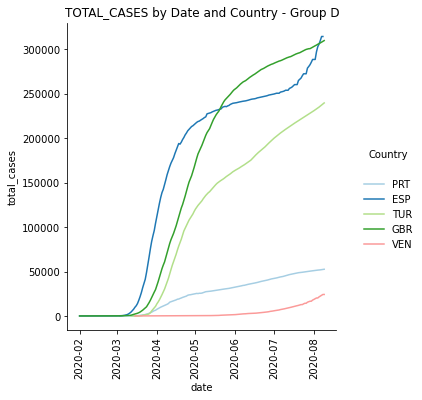

<Figure size 2160x720 with 0 Axes>

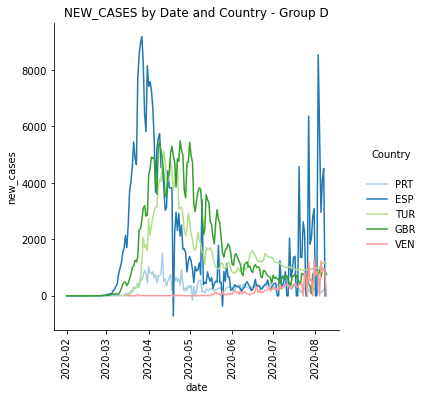

<Figure size 2160x720 with 0 Axes>

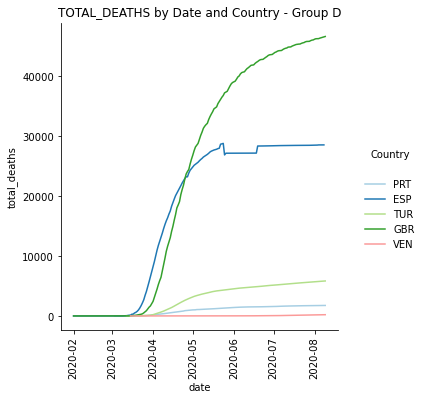

<Figure size 2160x720 with 0 Axes>

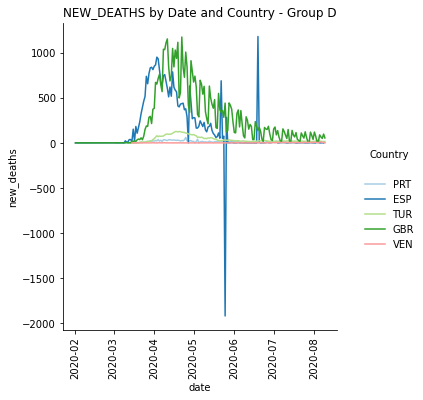

<Figure size 2160x720 with 0 Axes>

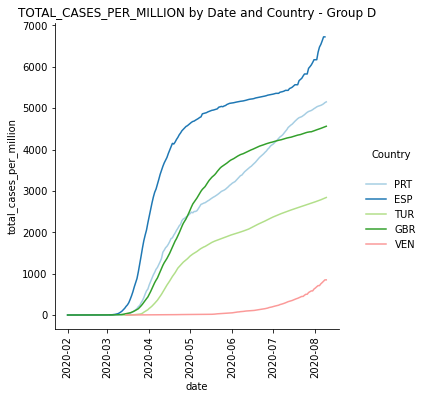

<Figure size 2160x720 with 0 Axes>

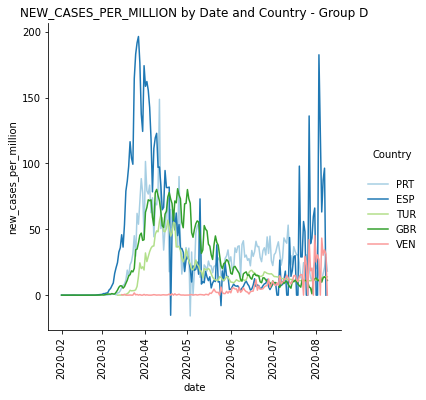

<Figure size 2160x720 with 0 Axes>

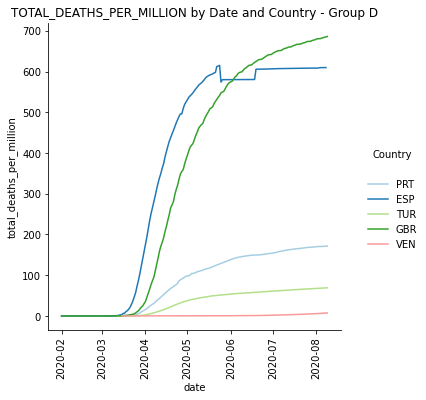

<Figure size 2160x720 with 0 Axes>

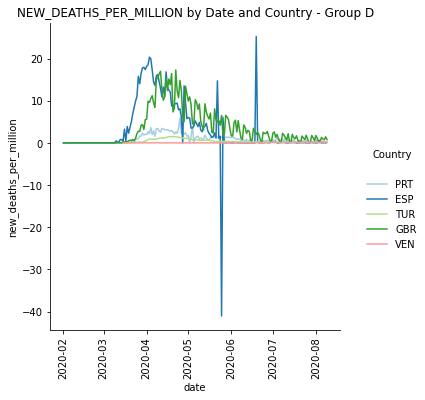

<Figure size 2160x720 with 0 Axes>

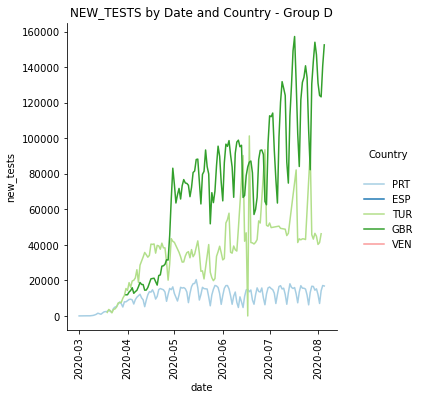

<Figure size 2160x720 with 0 Axes>

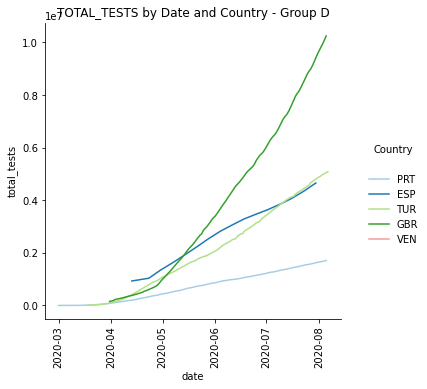

<Figure size 2160x720 with 0 Axes>

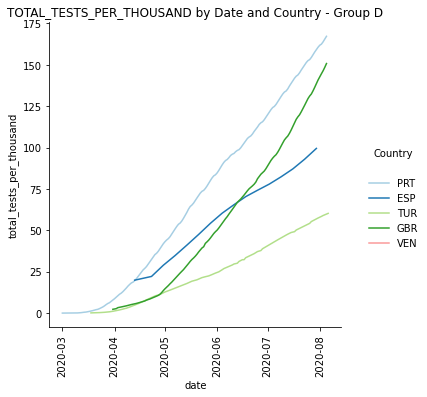

<Figure size 2160x720 with 0 Axes>

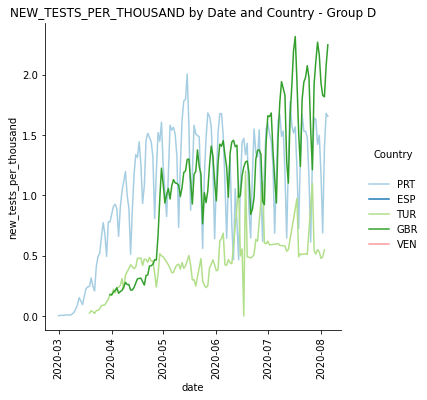

<Figure size 2160x720 with 0 Axes>

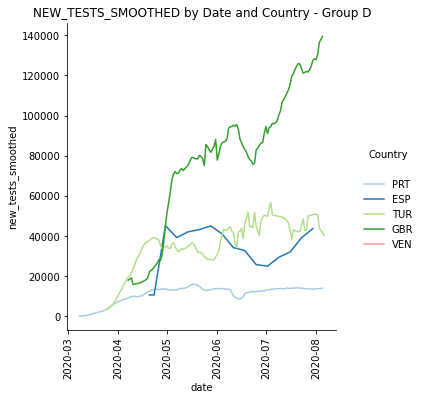

In [83]:
for elem in cols:
    graf_grupo("date" , elem , "iso_code", covid_grupoD, False )

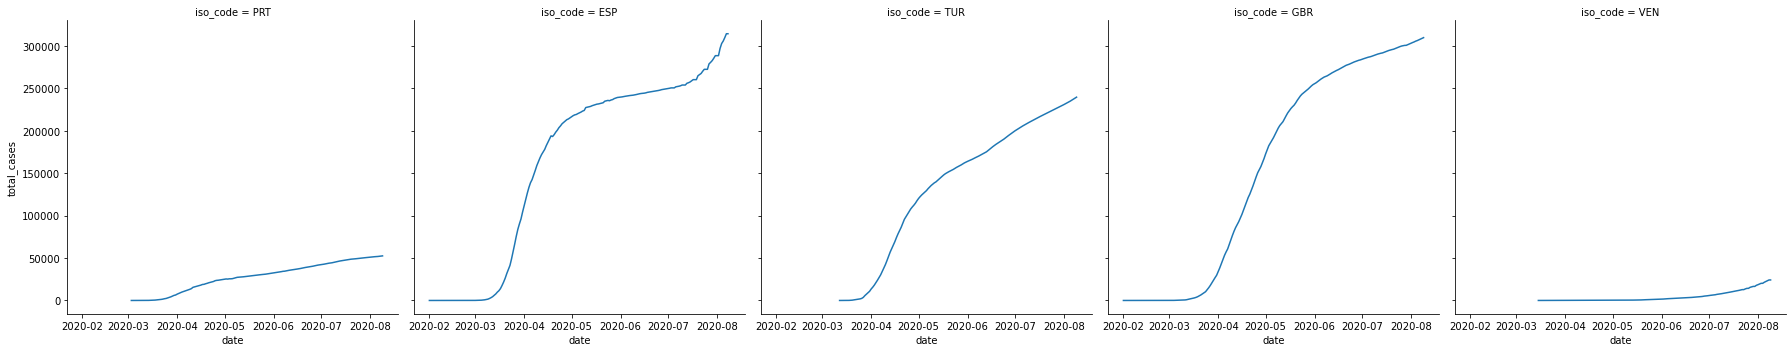

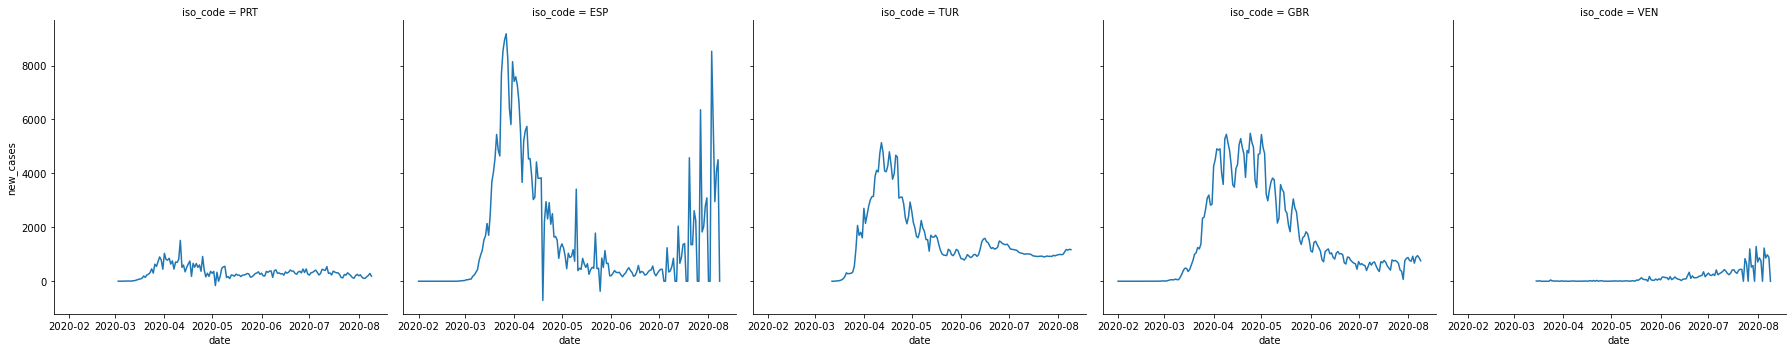

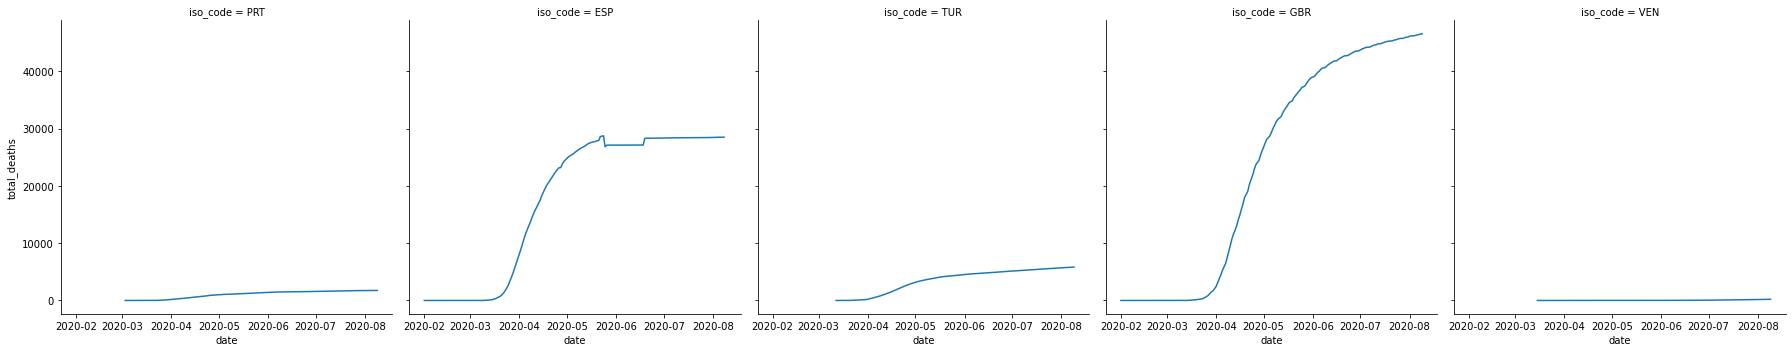

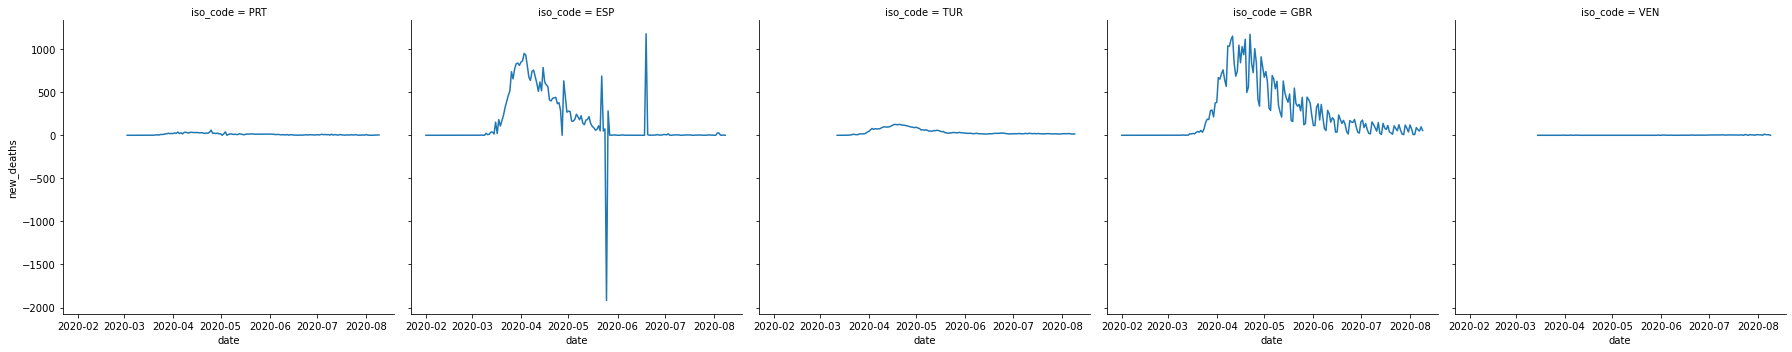

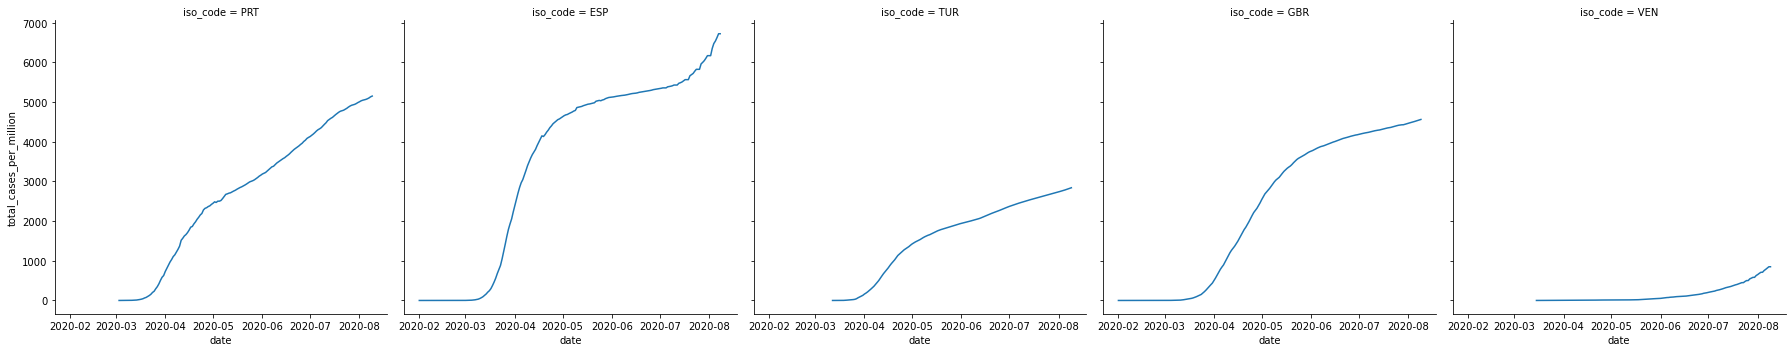

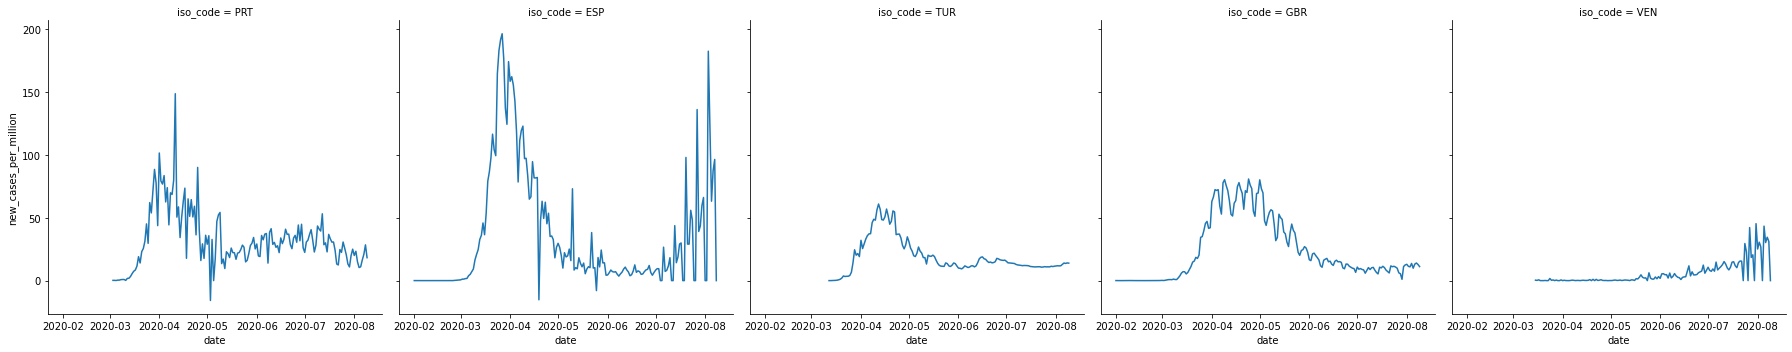

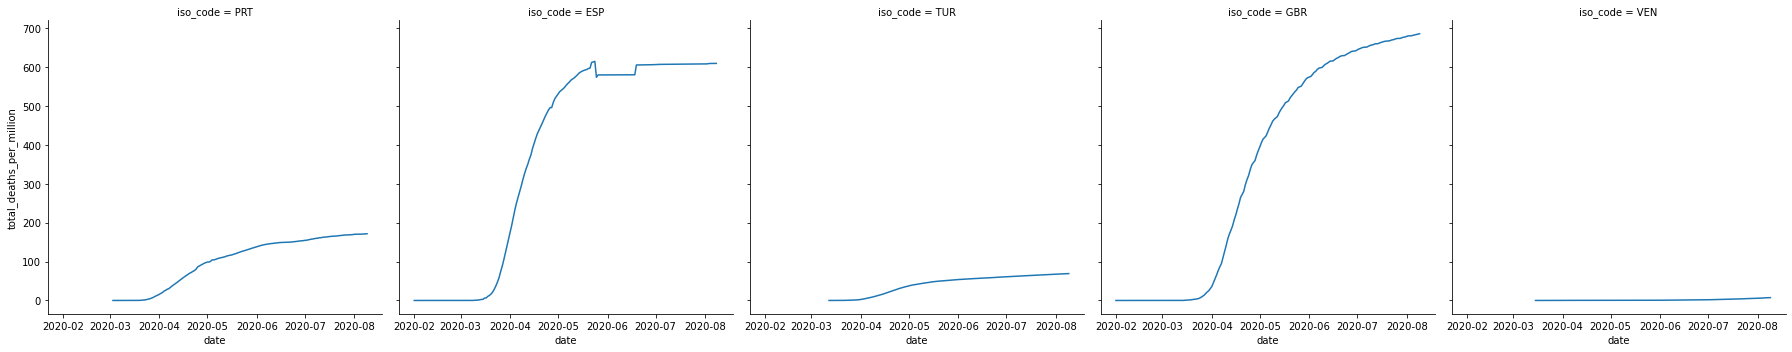

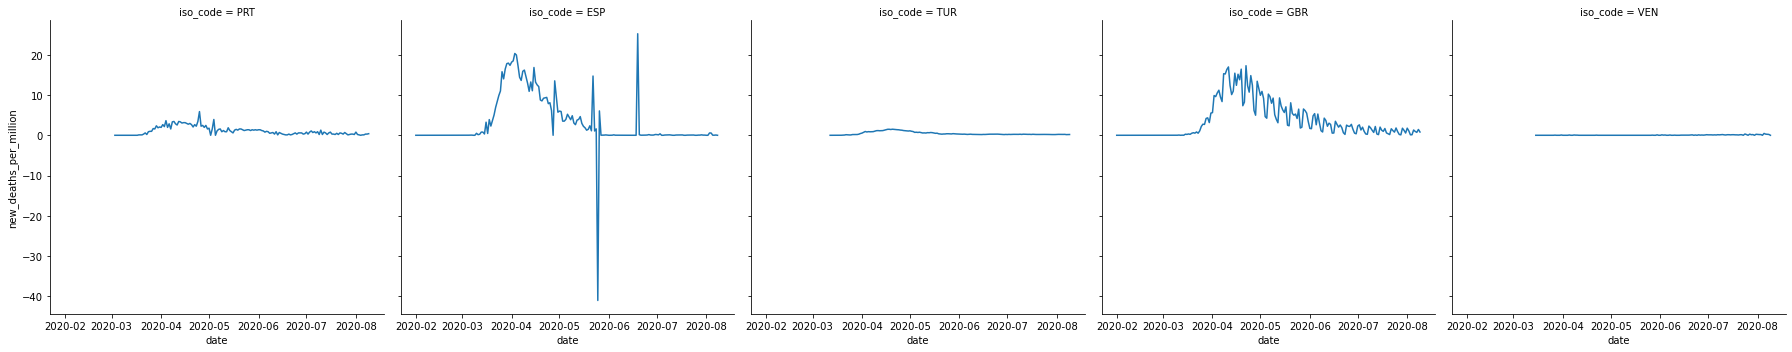

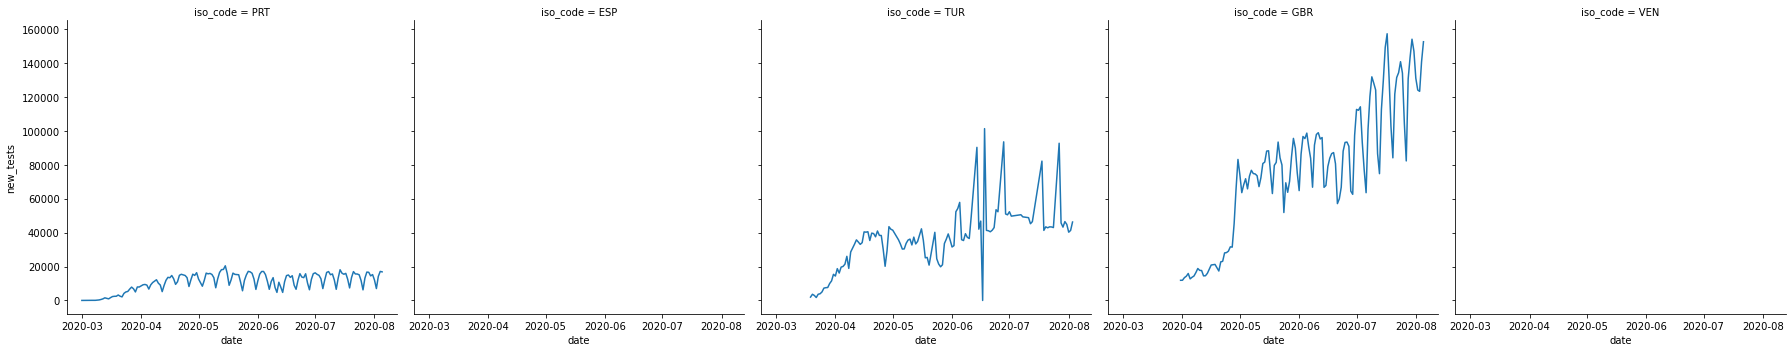

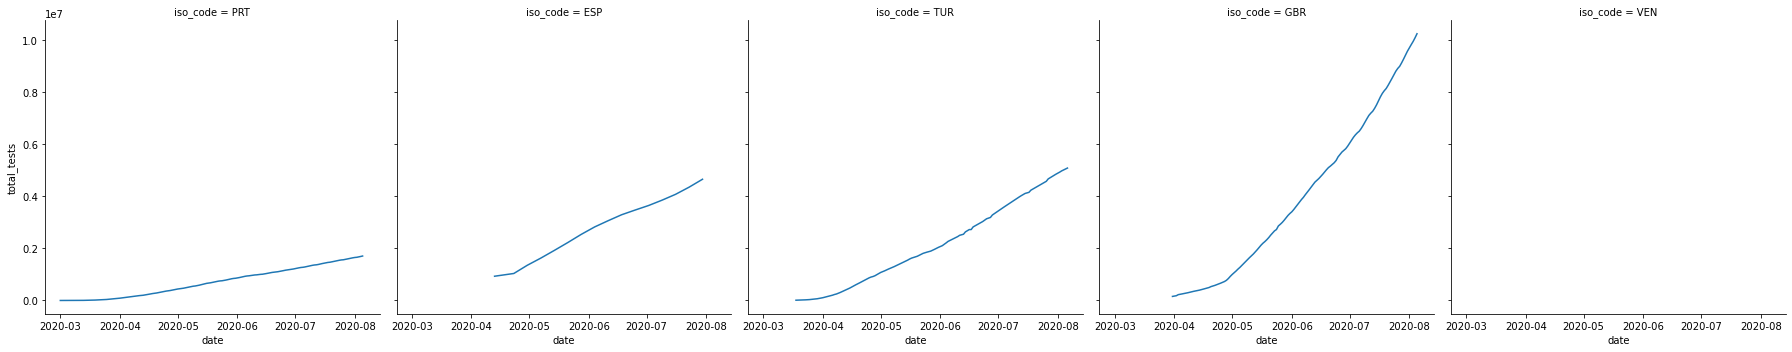

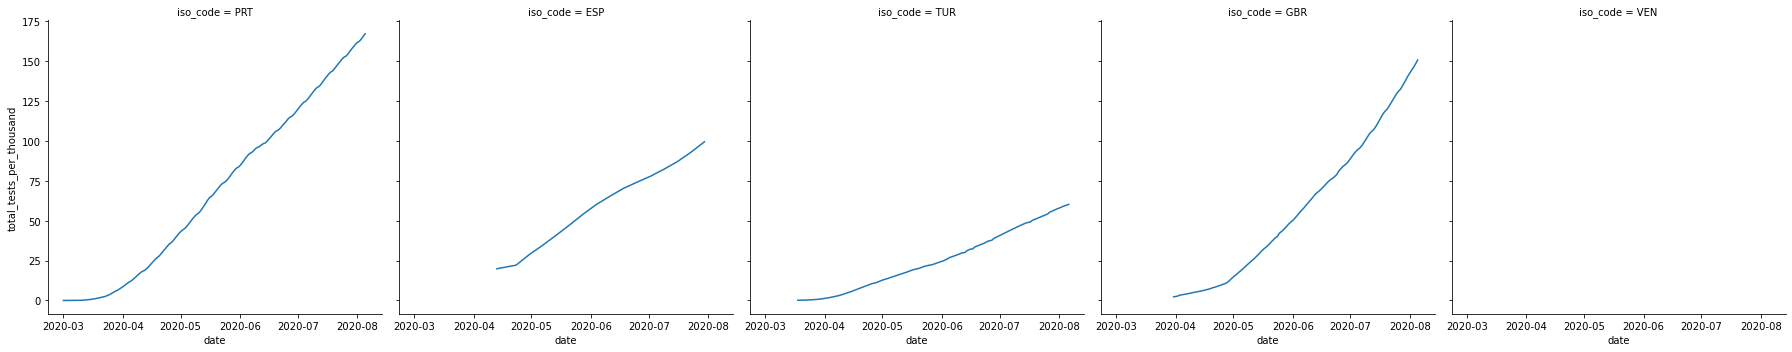

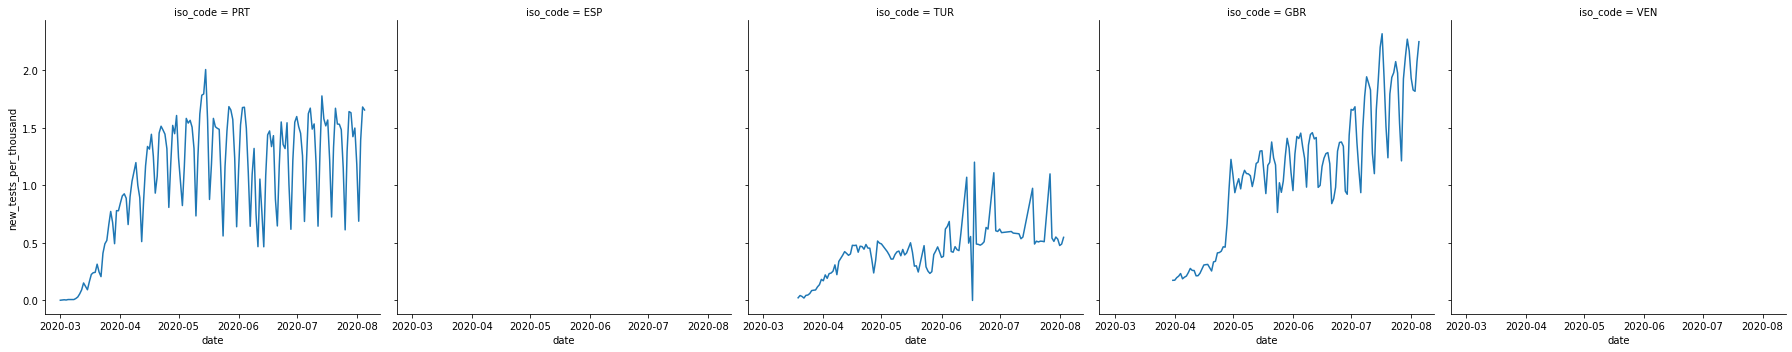

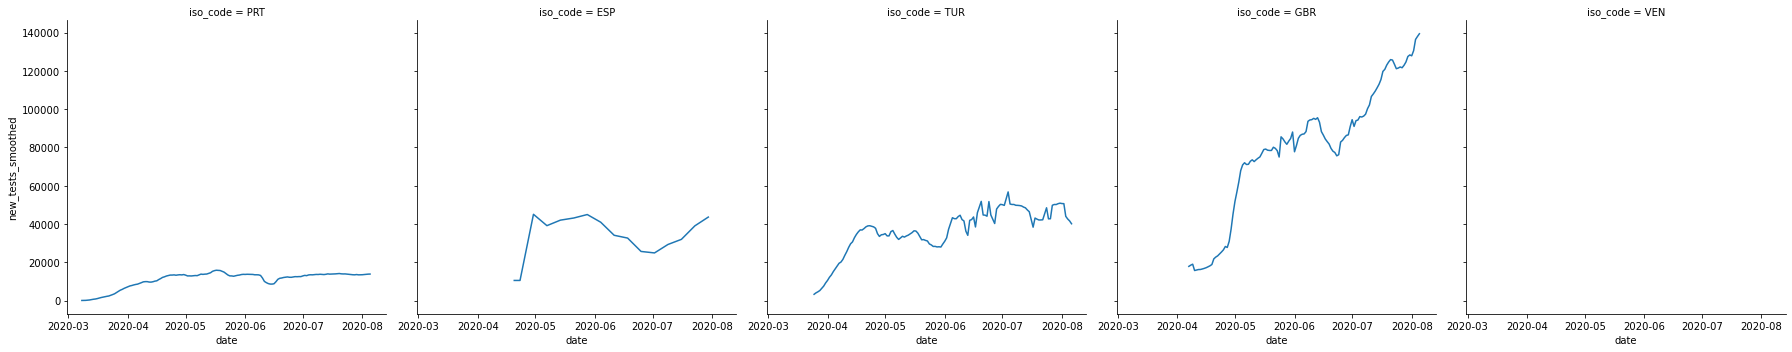

In [84]:
#Gráficos de cada variable separados por país
for elem in cols:
    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=covid_grupoD)

______________
## ANÁLISIS DETALLADO POR PAÍS
Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot
______________

### MUERTES TOTALES Y CASOS TOTALES DE CADA PAÍS (CONTRASTADOS CON FECHAS DE ESTADO DE ALARMA)

In [85]:
def graf_pais (ccode,col_dat, cname,cdf, y_maximo):
    if y_maximo:
        eje_y = cdf.total_cases.max()
        tit = cname.upper() + " COVID19 - TOTALES"
        filen= "Tot_"
    else:
        eje_y = cdf.rank_TCxM.max()
        tit = cname.upper() + " COVID19 - RANKING"
        filen= "Rank_"
    fg = cdf.plot(x="date", y= col_dat, kind="line", figsize=(12,8),title= tit)
    fg.legend(bbox_to_anchor=(1.2, 0.5))
    plt.vlines(alarm_dates.alarm_init[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.vlines(alarm_dates.alarm_end[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.savefig("../resources/"+ filen + elem+".png",bbox_inches='tight')
    plt.show()

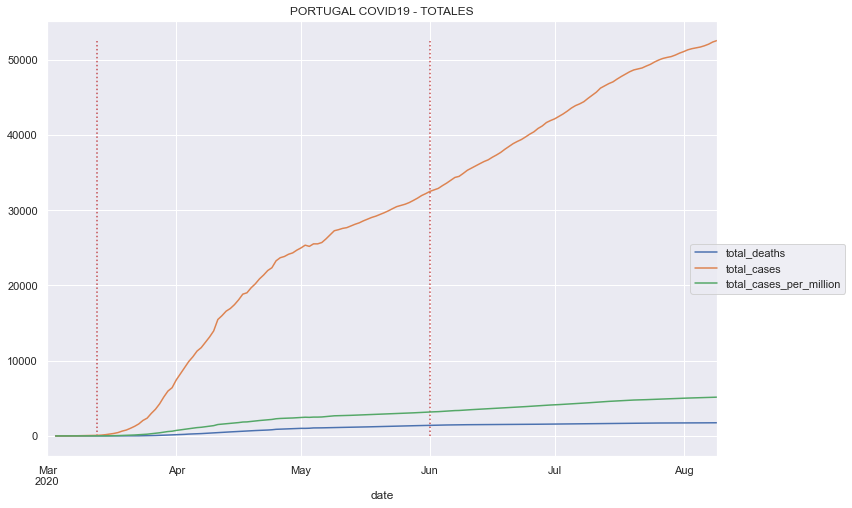

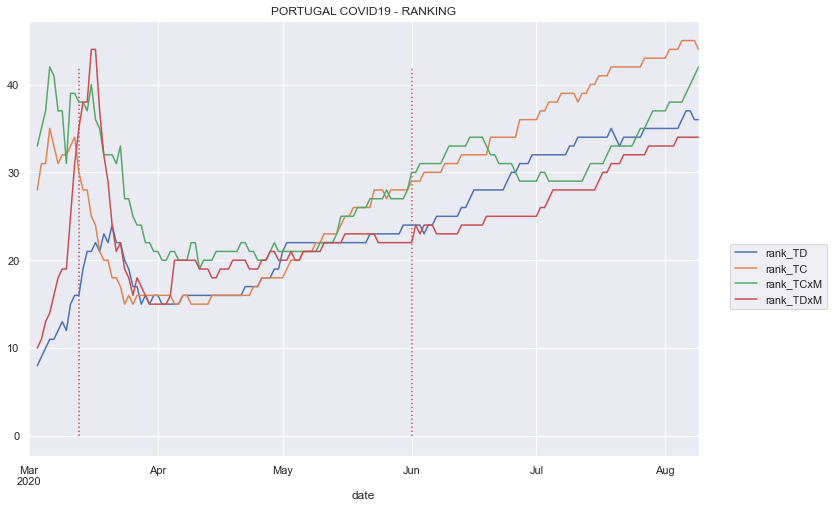

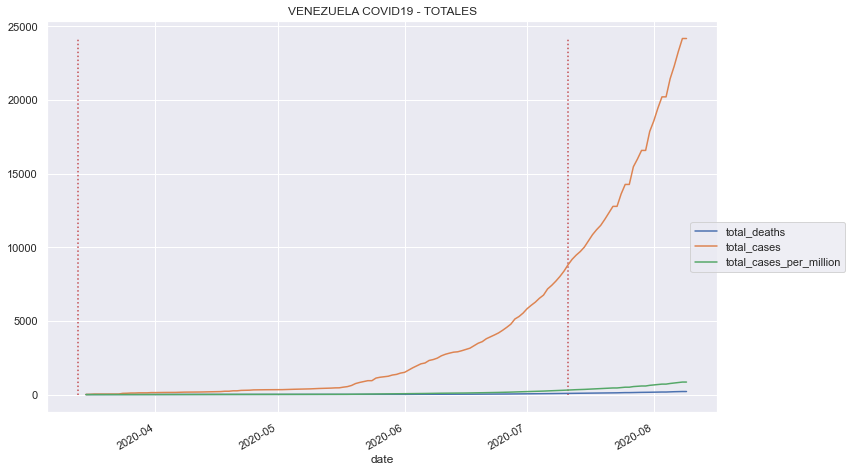

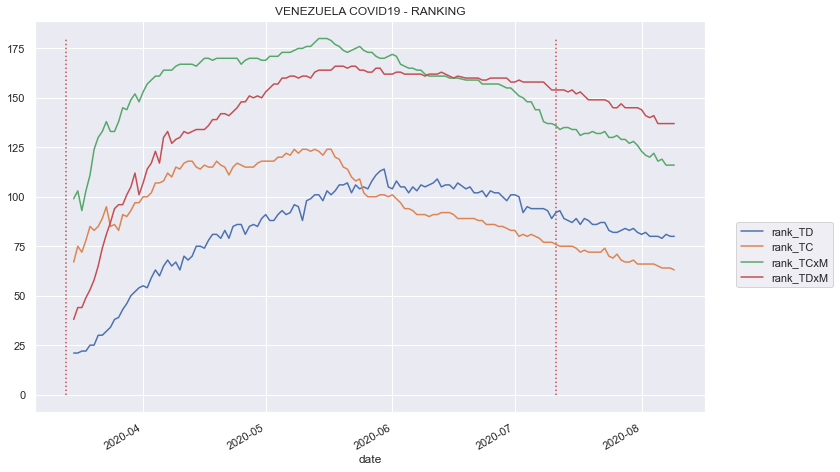

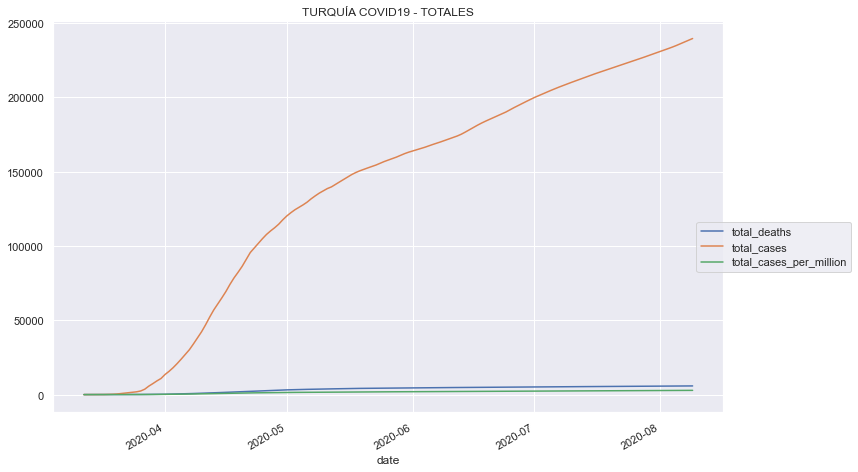

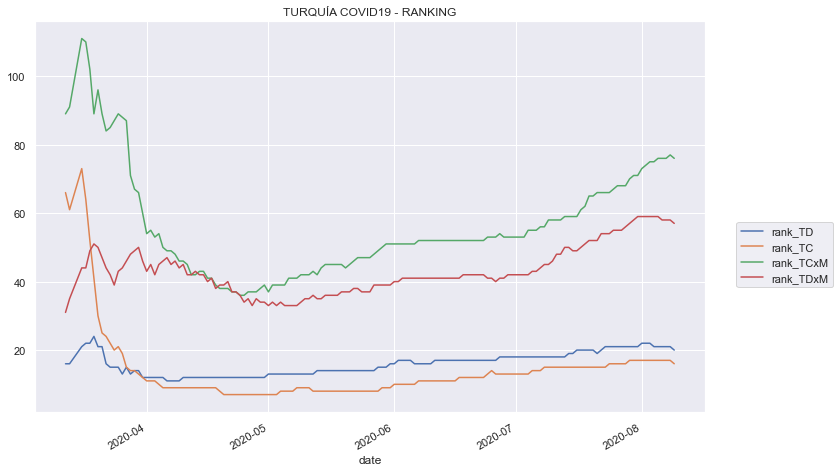

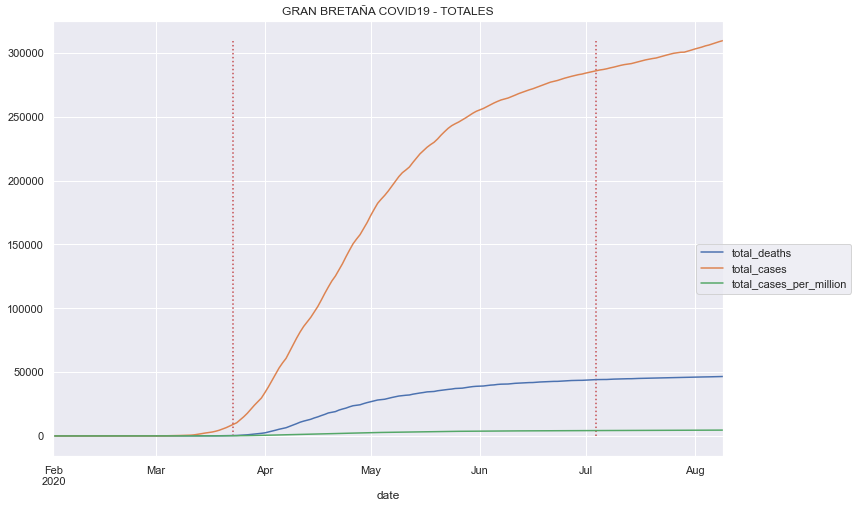

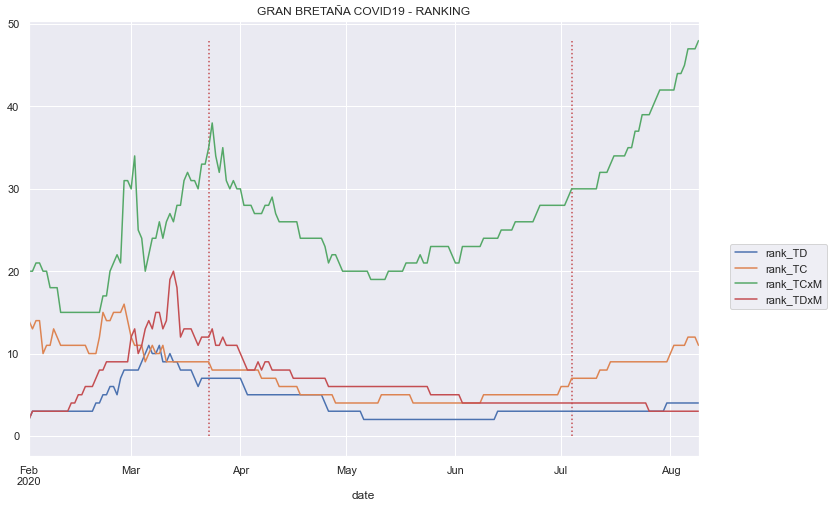

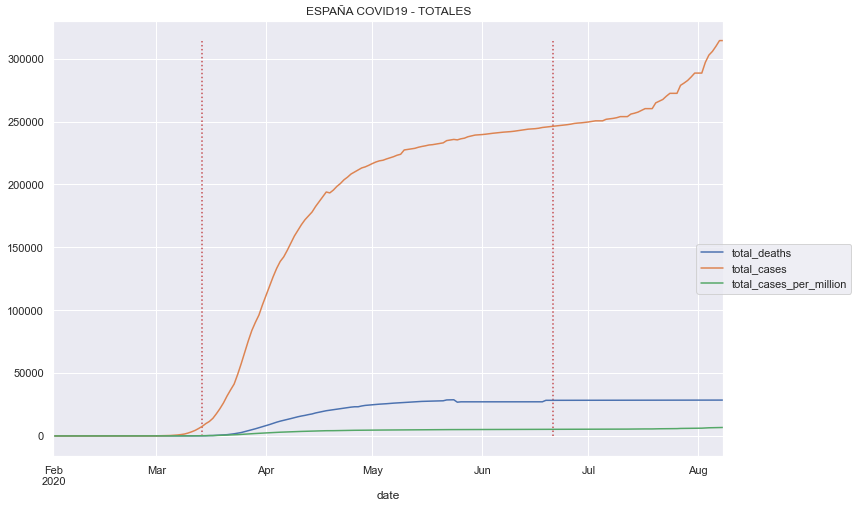

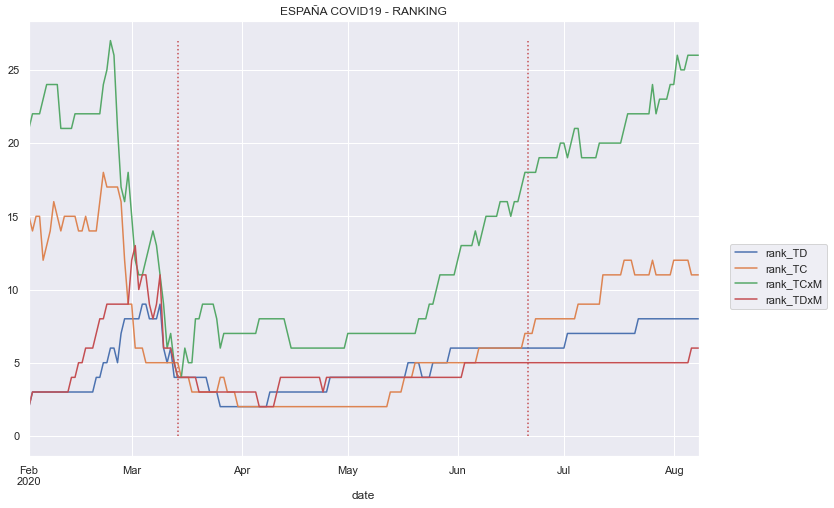

In [86]:
sns.set()
col_dat1 = ["total_deaths", "total_cases", "total_cases_per_million"]
col_dat2 = [ "rank_TD", "rank_TC", "rank_TCxM", "rank_TDxM"]
for elem in paises_grupoD:
    df = covid_grupoD[covid_grupoD.iso_code==elem]
    graf_pais(elem, col_dat1, paises_nombres[elem], df, True)
    graf_pais(elem, col_dat2, paises_nombres[elem], df, False)
  


In [ ]:
rank_TC	rank_TD	rank_TCxM	rank_TDxM

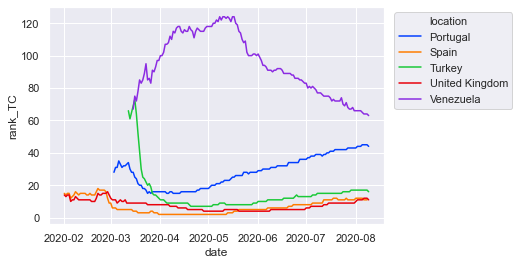

In [147]:
# Como han variado los paises en el rank_TC
lp = sns.lineplot('date','rank_TC', ci=None, hue='location', palette="bright",data=covid_grupoD) # dibujo grafico
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

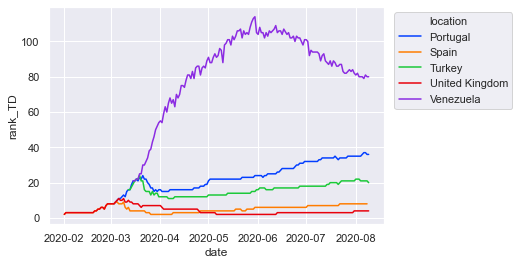

In [148]:
# Como han variado los paises en el rank_TD
lp = sns.lineplot('date','rank_TD', ci=None, hue='location', palette="bright",data=covid_grupoD) # dibujo grafico
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

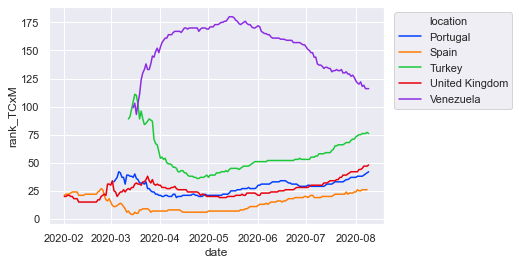

In [149]:
# Como han variado los paises en el rank_TCxM
lp = sns.lineplot('date','rank_TCxM', ci=None, hue='location', palette="bright",data=covid_grupoD) # dibujo grafico
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

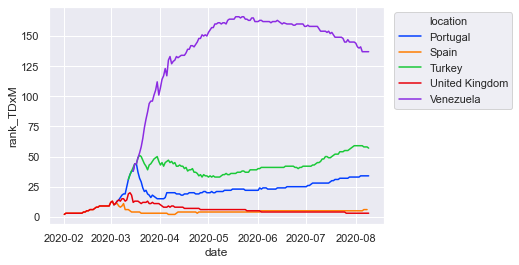

In [151]:
# Como han variado los paises en el rank_TDxM
lp = sns.lineplot('date','rank_TDxM', ci=None, hue='location', palette="bright",data=covid_grupoD) # dibujo grafico
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

In [87]:
#Dataframe con información resumida de datos referenciales por país
datos_paises = covid_grupoD.iloc[:,[1,20,21,22,23,24,29,30,32,33]].drop_duplicates()

In [88]:
datos_paises.info()
# Nota: 
# Stringency Index: The Government Response Stringency Index is a composite measure based on nine response indicators including
# school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 833
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_code               345 non-null    object 
 1   positive_rate          308 non-null    float64
 2   tests_units            315 non-null    object 
 3   stringency_index       331 non-null    float64
 4   population             345 non-null    float64
 5   population_density     345 non-null    float64
 6   extreme_poverty        336 non-null    float64
 7   cardiovasc_death_rate  345 non-null    float64
 8   female_smokers         336 non-null    float64
 9   male_smokers           336 non-null    float64
dtypes: float64(8), object(2)
memory usage: 27.0+ KB


In [89]:
datos_paises

iso_code  positive_rate     tests_units  stringency_index  population  \
0        PRT            NaN  samples tested             11.11  10196707.0   
8        PRT            NaN  samples tested             16.67  10196707.0   
9        PRT          0.044  samples tested             25.00  10196707.0   
10       PRT          0.027  samples tested             25.00  10196707.0   
11       PRT          0.024  samples tested             32.41  10196707.0   
..       ...            ...             ...               ...         ...   
751      VEN            NaN             NaN             85.19  28435943.0   
771      VEN            NaN             NaN             81.48  28435943.0   
790      VEN            NaN             NaN             87.04  28435943.0   
820      VEN            NaN             NaN             86.11  28435943.0   
833      VEN            NaN             NaN               NaN  28435943.0   

     population_density  extreme_poverty  cardiovasc_death_rate  \
0               112.371              0.5                127.842   
8               112.371              0.5                127.842   
9               112.371              0.5                127.842   
10              112.371              0.5                127.842   
11              112.371              0.5                127.842   
..                  ...              ...                    ...   
751              36.253              NaN                204.850   
771              36.253              NaN                204.850   
790              36.253              NaN                204.850   
820              36.253              NaN                204.850   
833              36.253              NaN                204.850   

     female_smokers  male_smokers  
0              16.3          30.0  
8              16.3          30.0  
9              16.3          30.0  
10             16.3          30.0  
11             16.3          30.0  
..              ...           ...  
751             NaN           NaN  
771             NaN           NaN  
790             NaN           NaN  
820             NaN           NaN  
833             NaN           NaN  

[345 rows x 10 columns]

_________
## CORRELACIÓN
______________

In [90]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            839 non-null    int64         
 1   iso_code                         839 non-null    object        
 2   continent                        839 non-null    object        
 3   location                         839 non-null    object        
 4   date                             839 non-null    datetime64[ns]
 5   total_cases                      837 non-null    float64       
 6   new_cases                        837 non-null    float64       
 7   total_deaths                     837 non-null    float64       
 8   new_deaths                       837 non-null    float64       
 9   total_cases_per_million          837 non-null    float64       
 10  new_cases_per_million            837 non-null    float64      

In [91]:
#Matriz de correlación entre variables
grupoD_corr = covid_grupoD.iloc[:,np.r_[1,5,7,9,11,22:36]]     #Un subconjunto de las variables a contrastar

In [92]:
grupoD_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    839 non-null    object 
 1   total_cases                 837 non-null    float64
 2   total_deaths                837 non-null    float64
 3   total_cases_per_million     837 non-null    float64
 4   total_deaths_per_million    837 non-null    float64
 5   stringency_index            798 non-null    float64
 6   population                  839 non-null    float64
 7   population_density          839 non-null    float64
 8   median_age                  839 non-null    float64
 9   aged_65_older               839 non-null    float64
 10  aged_70_older               839 non-null    float64
 11  gdp_per_capita              839 non-null    float64
 12  extreme_poverty             692 non-null    float64
 13  cardiovasc_death_rate       839 non

In [93]:
grupoD_corr.shape

(839, 19)

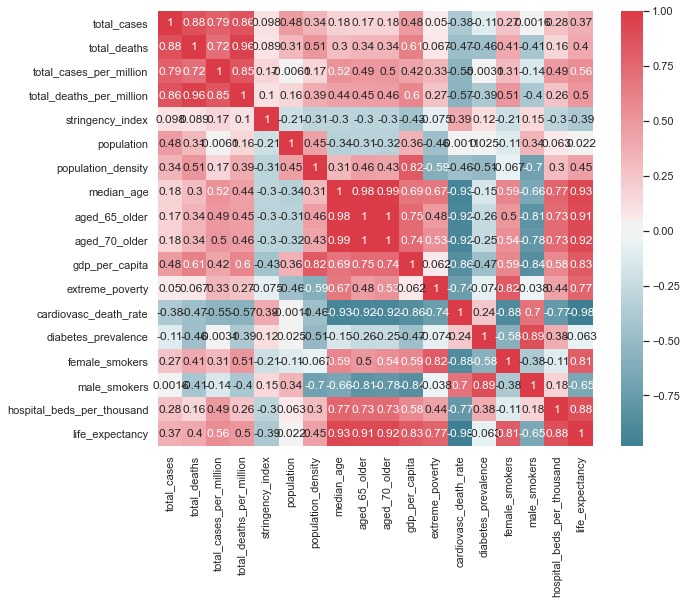

In [94]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = grupoD_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

## Matriz de correlación Todos los países.

In [95]:
#Seleccion del DF mundial del subconjunto de las variables a correlacionar
world_df_corr = world_df.iloc[:,np.r_[0,4,6,8,10,21:33,34:36]]    

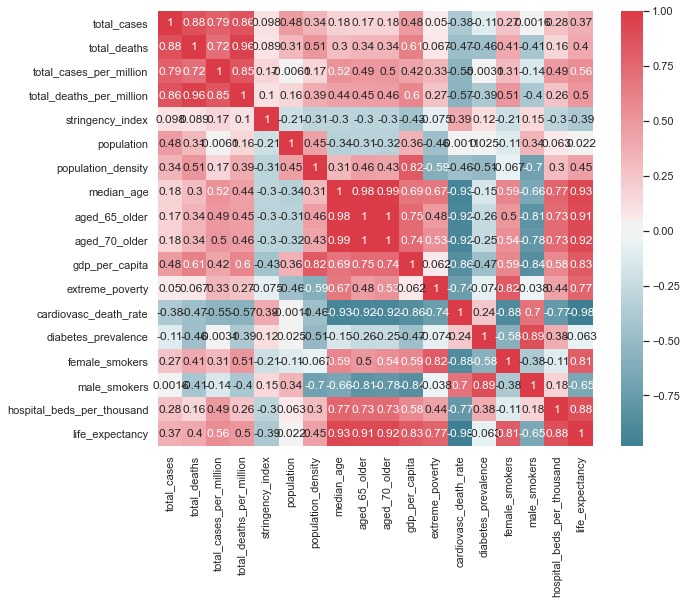

In [96]:
#Mapa de calor de la matriz de correlación 
f, ax = plt.subplots(figsize=(10, 8)) 
corr2 = world_df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

### NOTA:Otras pruebas. No considerar este código

In [97]:
#Dejar únicamente las columnas que interesan para la evaluación del ranking
#world_df = world_df[["iso_code", "continent", "location", "date", "total_cases", "total_deaths", "total_cases_per_million", "stringency_index", "population", "population_density","hospital_beds_per_thousand", "life_expectancy" ]]

In [98]:
#Crea un DF por cada país (llamado covid_ESP, etc) a partir de los datos del dataframe covid_grupoD. 
#for elem in paises_grupoD:
#    df_name = "covid_" + elem
#    globals()[df_name] = covid_grupoD[covid_grupoD.iso_code==elem]

In [99]:
#for elem in cols_rank:
#    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=rank_grupoD)

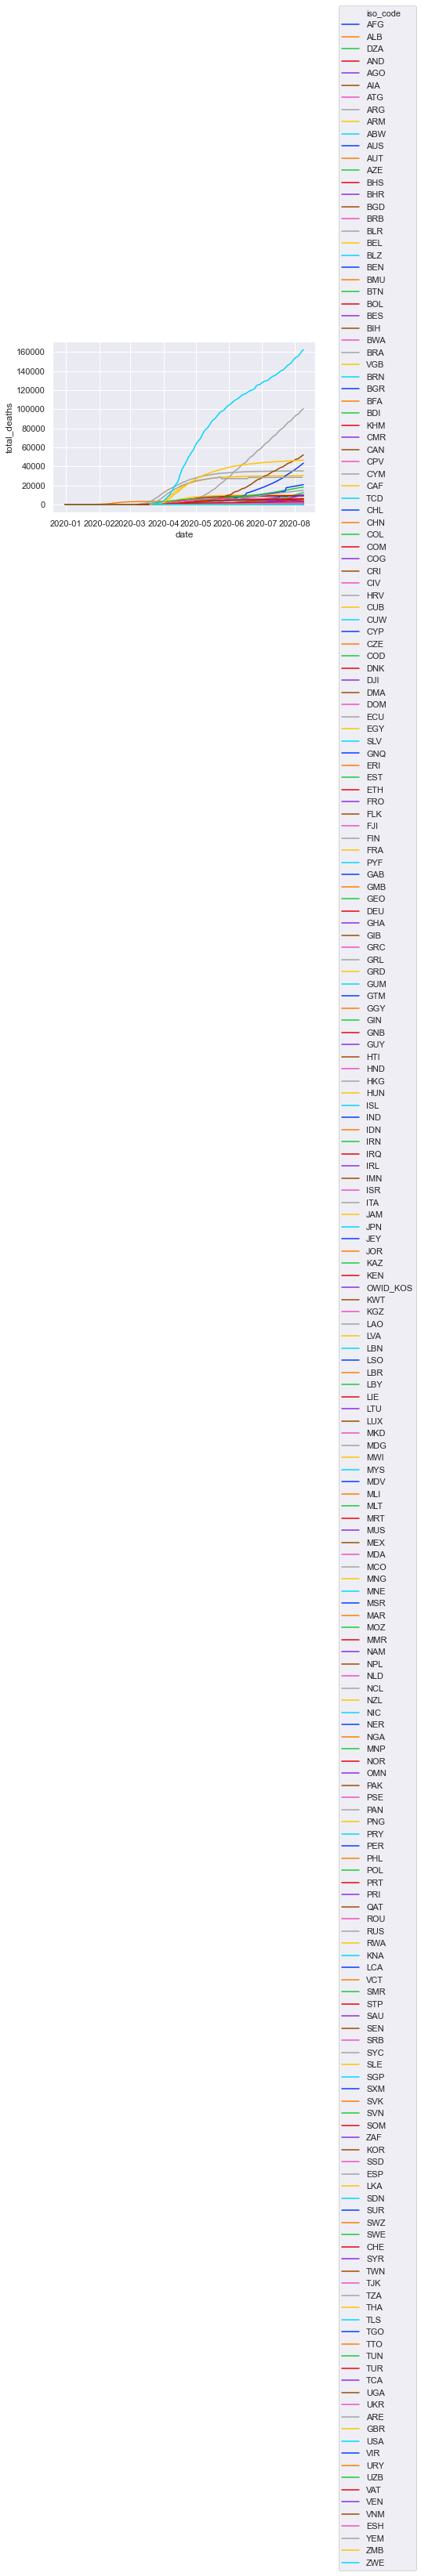

In [100]:
# Pruebas de Jose Luis.
# Para graficar total deaths de todos los paises.
lp = sns.lineplot('date','total_deaths', ci=None, hue='iso_code', palette="bright",data=world_df)
lp.legend(loc='upper right', bbox_to_anchor=(1.4,3))

# Para las líneas verticales del estado de alarma de un pais
#xposition = [pd.to_datetime('2020-03-14'), pd.to_datetime('2020-06-16')]
#for xc in xposition:
#    lp.axvline(x=xc, color='red', linestyle='--')

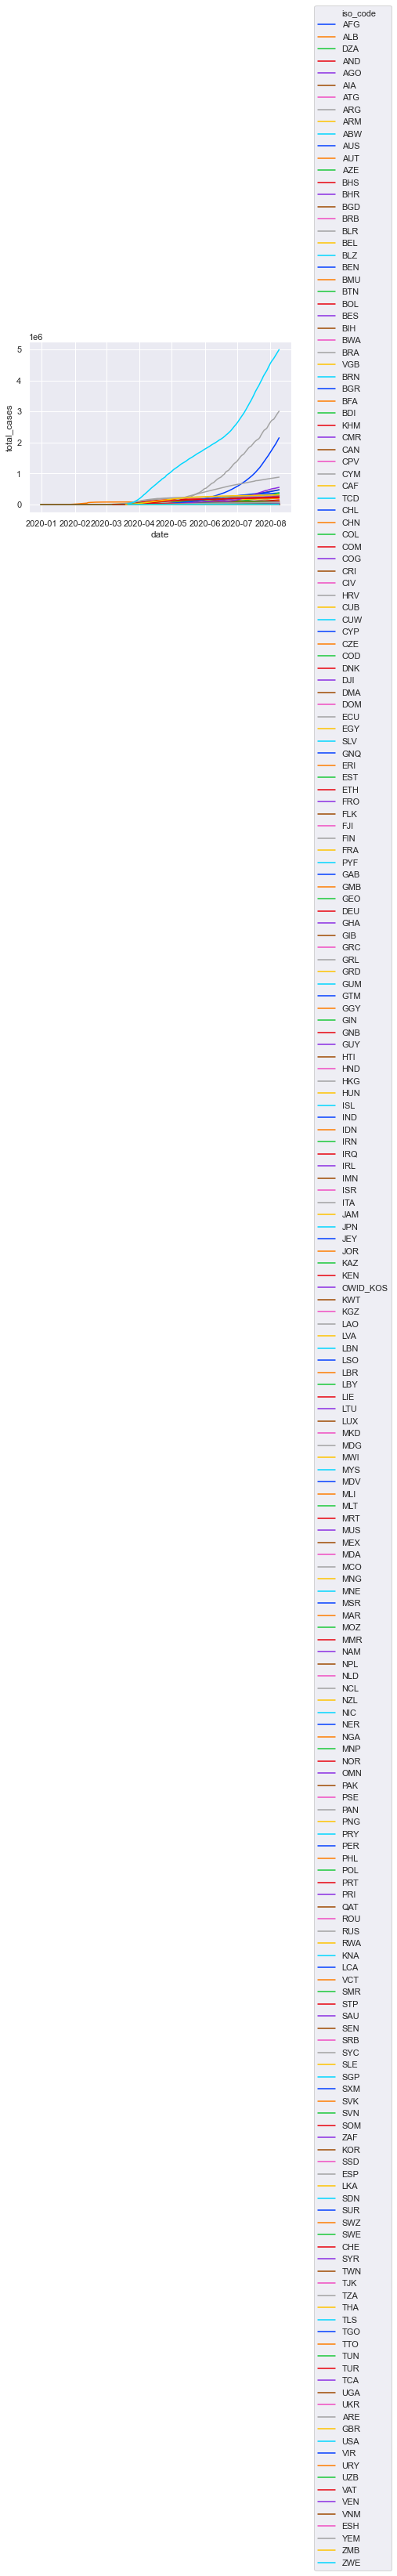

In [152]:
# Para graficar total cases de todos los paises.
lp = sns.lineplot('date','total_cases', ci=None, hue='iso_code', palette="bright",data=world_df)
lp.legend(loc='upper right', bbox_to_anchor=(1.4,3))

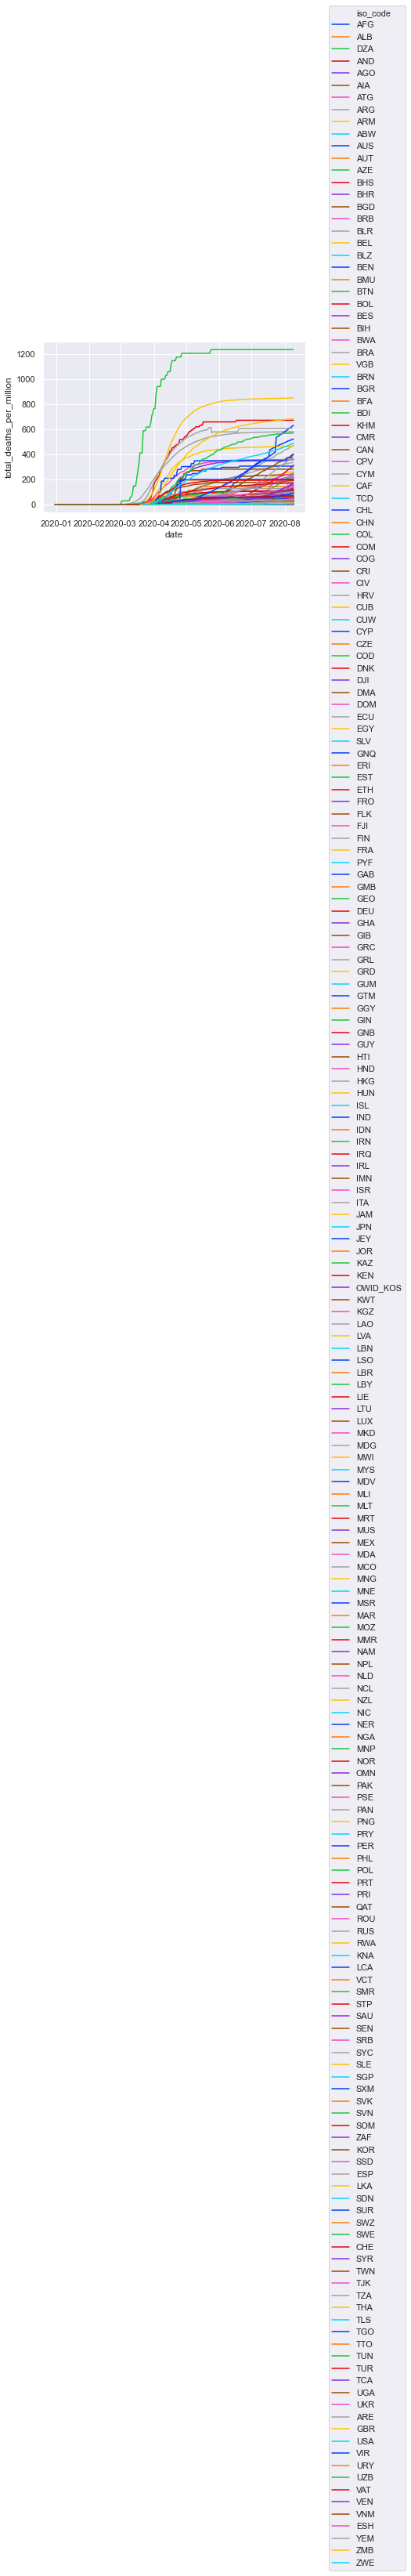

In [153]:
# Para graficar total deaths per million de todos los paises.
lp = sns.lineplot('date','total_deaths_per_million', ci=None, hue='iso_code', palette="bright",data=world_df)
lp.legend(loc='upper right', bbox_to_anchor=(1.4,3))

In [101]:
# Para poder establecer algún tipo de relación entre población de +65 y muertes por covid
# paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
# paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
# covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD.groupby('iso_code')['total_deaths'].max()

iso_code
ESP    28752.0
GBR    46566.0
PRT     1750.0
TUR     5829.0
VEN      208.0
Name: total_deaths, dtype: float64

In [102]:
# Añado la columna del indice de mortalidad al df
covid_grupoD['mortality_rate'] = round((covid_grupoD['total_deaths']/covid_grupoD['total_cases'])*100, 2)

In [103]:
covid_grupoD.tail()

index iso_code      continent   location       date  total_cases  \
834  34688      VEN  South America  Venezuela 2020-08-05      21438.0   
835  34689      VEN  South America  Venezuela 2020-08-06      22299.0   
836  34690      VEN  South America  Venezuela 2020-08-07      23280.0   
837  34691      VEN  South America  Venezuela 2020-08-08      24166.0   
838  34692      VEN  South America  Venezuela 2020-08-09      24166.0   

     new_cases  total_deaths  new_deaths  total_cases_per_million  ...  \
834     1232.0         187.0        13.0                  753.905  ...   
835      861.0         195.0         8.0                  784.184  ...   
836      981.0         202.0         7.0                  818.682  ...   
837      886.0         208.0         6.0                  849.840  ...   
838        0.0         208.0         0.0                  849.840  ...   

     diabetes_prevalence  female_smokers  male_smokers  \
834                 6.47             NaN           NaN   
835                 6.47             NaN           NaN   
836                 6.47             NaN           NaN   
837                 6.47             NaN           NaN   
838                 6.47             NaN           NaN   

     hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  rank_TCxM  \
834                         0.8            72.06     65.0     80.0      118.0   
835                         0.8            72.06     64.0     79.0      119.0   
836                         0.8            72.06     64.0     81.0      116.0   
837                         0.8            72.06     64.0     80.0      116.0   
838                         0.8            72.06     63.0     80.0      116.0   

     rank_TDxM  mortality_rate  
834      137.0            0.87  
835      137.0            0.87  
836      137.0            0.87  
837      137.0            0.86  
838      137.0            0.86  

[5 rows x 41 columns]

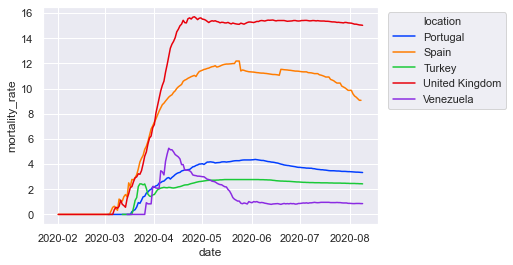

In [104]:
# Como a variado el indice de mortalidad
lp = sns.lineplot('date','mortality_rate', ci=None, hue='location', palette="bright",data=covid_grupoD) # dibujo grafico
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

In [120]:
world_df_map = (world_df.groupby('location')['total_cases'].max()).to_frame()
world_df_map['index'] = world_df_map.index
world_df_map.rename(columns={'index': 'country'}, inplace=True)
world_df_map

total_cases         country
location                                   
Afghanistan         37054.0     Afghanistan
Albania              6275.0         Albania
Algeria             34693.0         Algeria
Andorra               956.0         Andorra
Angola               1483.0          Angola
...                     ...             ...
Vietnam               812.0         Vietnam
Western Sahara        766.0  Western Sahara
Yemen                1800.0           Yemen
Zambia               7903.0          Zambia
Zimbabwe             4575.0        Zimbabwe

[210 rows x 2 columns]

In [106]:
fig = px.choropleth(world_df_map, locations=world_df_map['country'],
                    color=world_df_map['total_cases'],locationmode='country names', 
                    hover_name=world_df_map['country'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(title='Total Cases In Each Country',)
fig.show()

In [146]:
world_df_map_td = (world_df.groupby('location')['total_deaths'].max()).to_frame()
world_df_map_td['index'] = world_df_map_td.index
world_df_map_td.rename(columns={'index': 'country'}, inplace=True)

In [145]:
fig = px.choropleth(world_df_map_td, locations=world_df_map_td['country'],
                    color=world_df_map_td['total_deaths'],locationmode='country names', 
                    hover_name=world_df_map_td['country'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(title='Total Deaths in each Country',)
fig.show()

In [107]:
# Ejemplo de grafico de quesito
cdm=april['Cured/Discharged/Migrated'].sum()
d=april['Death'].sum()

plt.figure(figsize=(7,7))
plt.title("Current situartion in india",fontsize=20)
labels='Total Cases','Cured','Death'
sizes=[cases,cdm,d]
explode=[0.1,0.1,0.1]
colors=['lightcoral','yellowgreen','skyblue']
plt.axis('equal')
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.legend(labels, loc="best")
plt.show() 

NameError: name 'april' is not defined

In [108]:
# Obtengo dataframe de España desde el primer dia que hay un fallecido por COVID.
covid_grupoD_spain = covid_grupoD[(covid_grupoD['iso_code'] == 'ESP') & (covid_grupoD['total_deaths']>0)] 
covid_grupoD_spain.head()

index iso_code continent location       date  total_cases  new_cases  \
195  30025      ESP    Europe    Spain 2020-03-05        348.0       81.0   
196  30026      ESP    Europe    Spain 2020-03-06        531.0      183.0   
197  30027      ESP    Europe    Spain 2020-03-07        764.0      233.0   
198  30028      ESP    Europe    Spain 2020-03-08       1094.0      330.0   
199  30029      ESP    Europe    Spain 2020-03-09       1527.0      433.0   

     total_deaths  new_deaths  total_cases_per_million  ...  \
195           1.0         1.0                    7.443  ...   
196           3.0         2.0                   11.357  ...   
197           5.0         2.0                   16.341  ...   
198           5.0         0.0                   23.399  ...   
199           5.0         0.0                   32.660  ...   

     diabetes_prevalence  female_smokers  male_smokers  \
195                 7.17            27.4          31.4   
196                 7.17            27.4          31.4   
197                 7.17            27.4          31.4   
198                 7.17            27.4          31.4   
199                 7.17            27.4          31.4   

     hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  rank_TCxM  \
195                        2.97            83.56      5.0      9.0       12.0   
196                        2.97            83.56      5.0      8.0       13.0   
197                        2.97            83.56      5.0      8.0       14.0   
198                        2.97            83.56      5.0      8.0       13.0   
199                        2.97            83.56      5.0      9.0       11.0   

     rank_TDxM  mortality_rate  
195       11.0            0.29  
196        9.0            0.56  
197        8.0            0.65  
198        9.0            0.46  
199       11.0            0.33  

[5 rows x 41 columns]

In [109]:
# Grafico de barras de España con los casos y las muertes diarias.
fig = go.Figure(data=[
    go.Bar(name='New daily cases', x=covid_grupoD_spain['date'], y=covid_grupoD_spain['new_cases']),
    go.Bar(name='Daily deaths', x=covid_grupoD_spain['date'], y=covid_grupoD_spain['new_deaths'])])
# Change the bar mode
fig.update_layout(barmode='overlay', title='Daily Case and Death (Spain)',
                 annotations=[dict(x='2020-03-15', y=1407, xref="x", yref="y", text="Lockdown started", showarrow=True, arrowhead=1, ax=-50, ay=-70)])
fig.show()

Grafico de barras animado que muestra como aumenta diariamente el número de new_cases

In [110]:
import plotly.express as px
import time
import plotly.graph_objs as go
import plotly.offline as py
import plotly.io as pio
py.offline.init_notebook_mode(connected=True)

In [111]:
#Selección de los registros a partir de la fecha en que comenzaron a reportar nuevos casos de COVID
covid_grupoD[(covid_grupoD['new_cases']>0) & (covid_grupoD.iso_code =='GBR')].head(2)

index iso_code continent        location       date  total_cases  \
501  33551      GBR    Europe  United Kingdom 2020-02-01          2.0   
505  33555      GBR    Europe  United Kingdom 2020-02-05          3.0   

     new_cases  total_deaths  new_deaths  total_cases_per_million  ...  \
501        2.0           0.0         0.0                    0.029  ...   
505        1.0           0.0         0.0                    0.044  ...   

     diabetes_prevalence  female_smokers  male_smokers  \
501                 4.28            20.0          24.7   
505                 4.28            20.0          24.7   

     hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  rank_TCxM  \
501                        2.54            81.32     14.0      2.0       20.0   
505                        2.54            81.32     10.0      3.0       20.0   

     rank_TDxM  mortality_rate  
501        2.0             0.0  
505        3.0             0.0  

[2 rows x 41 columns]

In [112]:
covid_grupoD_infected = covid_grupoD.iloc[:,[1,3,4,5,6,7,8]]
covid_grupoD_infected

iso_code   location       date  total_cases  new_cases  total_deaths  \
0        PRT   Portugal 2020-03-01          NaN        NaN           NaN   
1        PRT   Portugal 2020-03-02          NaN        NaN           NaN   
2        PRT   Portugal 2020-03-03          2.0        2.0           0.0   
3        PRT   Portugal 2020-03-04          4.0        2.0           0.0   
4        PRT   Portugal 2020-03-05          5.0        1.0           0.0   
..       ...        ...        ...          ...        ...           ...   
834      VEN  Venezuela 2020-08-05      21438.0     1232.0         187.0   
835      VEN  Venezuela 2020-08-06      22299.0      861.0         195.0   
836      VEN  Venezuela 2020-08-07      23280.0      981.0         202.0   
837      VEN  Venezuela 2020-08-08      24166.0      886.0         208.0   
838      VEN  Venezuela 2020-08-09      24166.0        0.0         208.0   

     new_deaths  
0           NaN  
1           NaN  
2           0.0  
3           0.0  
4           0.0  
..          ...  
834        13.0  
835         8.0  
836         7.0  
837         6.0  
838         0.0  

[839 rows x 7 columns]

In [113]:
covid_grupoD_infected["new_date"] = covid_grupoD_infected.date.apply(lambda x: x.strftime("%d %b, %Y"))
covid_grupoD_infected.fillna(0, inplace=True)

In [114]:
total_s = covid_grupoD_infected[covid_grupoD_infected['date']>'2020-03-15']
total_s

iso_code   location       date  total_cases  new_cases  total_deaths  \
15       PRT   Portugal 2020-03-16        245.0       76.0           0.0   
16       PRT   Portugal 2020-03-17        331.0       86.0           0.0   
17       PRT   Portugal 2020-03-18        448.0      117.0           1.0   
18       PRT   Portugal 2020-03-19        642.0      194.0           2.0   
19       PRT   Portugal 2020-03-20        785.0      143.0           3.0   
..       ...        ...        ...          ...        ...           ...   
834      VEN  Venezuela 2020-08-05      21438.0     1232.0         187.0   
835      VEN  Venezuela 2020-08-06      22299.0      861.0         195.0   
836      VEN  Venezuela 2020-08-07      23280.0      981.0         202.0   
837      VEN  Venezuela 2020-08-08      24166.0      886.0         208.0   
838      VEN  Venezuela 2020-08-09      24166.0        0.0         208.0   

     new_deaths      new_date  
15          0.0  16 Mar, 2020  
16          0.0  17 Mar, 2020  
17          1.0  18 Mar, 2020  
18          1.0  19 Mar, 2020  
19          1.0  20 Mar, 2020  
..          ...           ...  
834        13.0  05 Aug, 2020  
835         8.0  06 Aug, 2020  
836         7.0  07 Aug, 2020  
837         6.0  08 Aug, 2020  
838         0.0  09 Aug, 2020  

[733 rows x 8 columns]

In [115]:
total_bar = total_s.groupby(["date","new_date",'location'])["date","location","total_cases","new_cases","total_deaths","new_deaths"].sum().reset_index()
total_bar

date      new_date        location  total_cases  new_cases  \
0   2020-03-16  16 Mar, 2020        Portugal        245.0       76.0   
1   2020-03-16  16 Mar, 2020           Spain      11491.0     1706.0   
2   2020-03-16  16 Mar, 2020          Turkey         18.0       16.0   
3   2020-03-16  16 Mar, 2020  United Kingdom       2605.0      361.0   
4   2020-03-16  16 Mar, 2020       Venezuela         15.0        5.0   
..         ...           ...             ...          ...        ...   
728 2020-08-08  08 Aug, 2020       Venezuela      24166.0      886.0   
729 2020-08-09  09 Aug, 2020        Portugal      52537.0      186.0   
730 2020-08-09  09 Aug, 2020          Turkey     239622.0     1172.0   
731 2020-08-09  09 Aug, 2020  United Kingdom     309763.0      758.0   
732 2020-08-09  09 Aug, 2020       Venezuela      24166.0        0.0   

     total_deaths  new_deaths  
0             0.0         0.0  
1           288.0       152.0  
2             0.0         0.0  
3            43.0        15.0  
4             0.0         0.0  
..            ...         ...  
728         208.0         6.0  
729        1750.0         4.0  
730        5829.0        16.0  
731       46566.0        55.0  
732         208.0         0.0  

[733 rows x 7 columns]

In [117]:
fig = px.bar(total_bar, x="location", y="total_cases", color="location",
              animation_frame="new_date", animation_group="location",  range_y=[0,total_bar.total_cases.max()+1000],title= "Total cases by Country") 
fig.show()